In [ ]:
#definition de la fonction unpickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
file='C:/Users/elmai/Downloads/data/data_batch_1'

In [ ]:
data=unpickle(file)

In [ ]:
#la definition de la fonction read_cifar_batch pour lire un seul batch
import numpy as np
def read_cifar_batch(file,k=0):
  batch=unpickle(file)
  if k==0:
    return batch[b'data']
  if k==1:
    return np.array(batch[b'labels'])

In [ ]:
#la defintion de la fonction split_dataset
from numpy.random import PCG64
import numpy as np
from sklearn.model_selection import train_test_split
def split_dataset(data,label,split,k=0):
  data_train, data_test, labels_train, labels_test = train_test_split(data,label, test_size=split, random_state=42)
  if k==0:
    return data_train
  if k==1:
    return data_test
  if k==2:
    return labels_train
  if k==3:
    return labels_test

In [ ]:
# spliter le première batch e data_train,data_test,labels_train et labels_test
data_train=split_dataset(read_cifar_batch(file,0),read_cifar_batch(file,1),0.2,0)
data_test=split_dataset(read_cifar_batch(file,0),read_cifar_batch(file,1),0.2,1)
labels_train=split_dataset(read_cifar_batch(file,0),read_cifar_batch(file,1),0.2,2)
labels_test=split_dataset(read_cifar_batch(file,0),read_cifar_batch(file,1),0.2,3)

In [ ]:
import numpy as np

N = 30  # number of input data
d_in = 3  # input dimension
d_h = 3  # number of neurons in the hidden layer
d_out = 2  # output dimension (number of neurons of the output layer)

# Random initialization of the network weights and biaises
w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
b1 = np.zeros((1, d_h))  # first layer biaises
w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
b2 = np.zeros((1, d_out))  # second layer biaises

data = np.random.rand(N, d_in)  # create a random data
targets = np.random.rand(N, d_out)  # create a random targets

# Forward pass
a0 = data # the data are the input of the first layer
z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
z2 = np.matmul(a1, w2) + b2  # input of the output layer
a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
predictions = a2  # the predicted values are the outputs of the output layer

# Compute loss (MSE)
loss = np.mean(np.square(predictions - targets))
print(loss)


0.118068599452887


In [ ]:
labels_train.shape

(8000,)

Dans cette partie on va définir la fonction learn_once_mse

In [ ]:
def learn_once_mse(w1,b1,w2,b2,data,a1,a2,targets,lr=0.001,k=1):
  
  # Dans cette partie on va calculer les dérivées partielles 

  dc_a2=(a2-targets)*2/data.shape[0] # calcule de la dérivé du cout par rapport à a2 de dimension 
  dc_z2=dc_a2*a2*(1-a2) # calcule la dérivé du cout par rapport à z2
  dc_w2=np.dot(a1.T,dc_z2)#calcule de la dérivé du cout par rapport à w2
  mat=np.ones((1,data.shape[0]),dtype=float) 
  dc_b2=np.dot(mat,dc_z2) # calcule de dérivé du cout par rapport à b2
  dc_a1=np.dot(dc_z2,w2.T)# calcule de la dérivé du cout par rapport à a1
  dc_z1=dc_a1*a1*(1-a1)# calcule de la dérivé du cout par rapport à z1
  dc_w1=np.dot(data.T,dc_z1)# calcule de la dérivé du cout par rapport à w1
  dc_b1=np.dot(mat,dc_z1)#calcule de la dérivé du cout par rapport à b1
  
  
  #la mise à jour des poids et des bias
  w1=w1-lr*dc_w1
  w2=w2-lr*dc_w2
  b1=b1-lr*dc_b1
  b2=b2-lr*dc_b2

  # Forward pass
  a0 = data # the data are the input of the first layer
  z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
  a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
  z2 = np.matmul(a1, w2) + b2  # input of the output layer
  a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
  predictions = a2  # the predicted values are the outputs of the output layer

  # Compute loss (MSE)
  loss = np.mean(np.square(predictions - targets))

  # retourner la valeur souhaité selon la valeur de k
  if k==1:
    return w1
  if k==2:
    return w2
  if k==3:
    return b1
  if k==4:
    return b2
  if k==5:
    return loss

In [ ]:
#tester la fonction learn_once_mse qui va retourner le loss
learn_once_mse(w1,b1,w2,b2,data,a1,a2,targets,lr=0.001,k=5)

0.1180601493151672

La création de la focntion one_hot

In [ ]:
# la création de la fonction on_hot
a = np.array([1, 2,0])

def one_hot(a):
  b = np.zeros((a.size, a.max() + 1))
  b[np.arange(a.size), a] = 1

  return b

In [ ]:
#testet la fonction one_hot
one_hot(a)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

On va définir la fonction learn_once_cross_entropy: pour définir cette fonction on va suivre les mêmes démarches de la fonction learn_once_mse , la seule différence sera au niveau de la dérive du cout par rapport à z2 qui est calculé par la formules suivantes dc_z2=a2-y

In [ ]:
import numpy as np

N = data_train.shape[0]  # number of input data
d_in = data_train.shape[1]  # input dimension
d_h = 10 # number of neurons in the hidden layer
d_out = 10  # output dimension (number of neurons of the output layer)

# Random initialization of the network weights and biaises
w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
b1 = np.zeros((1, d_h))  # first layer biaises
w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
b2 = np.zeros((1, d_out))  # second layer biaises

data = data_train  # create a random data
targets = labels_train  # create a random targets

# Forward pass
a0 = data # the data are the input of the first layer
z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
z2 = np.matmul(a1, w2) + b2  # input of the output layer
a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
predictions = a2  # the predicted values are the outputs of the output layer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


Création de la fonction qui définie le loss de cross entropy

In [ ]:
#creation de la fonction loss entroy
import math
def loss_entropy(target,Y):
   all_loss=[]
   hot_trgt=one_hot(targets)
   for i in range(hot_trgt.shape[0]):
      loss=0
      for j in range(hot_trgt.shape[1]):
         loss-=hot_trgt[i][j]*math.log2(Y[i][j])
      all_loss.append(loss)
   return sum(all_loss)/hot_trgt.shape[0]

On va créer la focntion qui calcule l'accuracy qui prend 2 paramètres (la matrices targets qui contient les valeurs de la sortie souhaité et la matrice predicts qui contient les valeurs prédits)

In [ ]:
# la création de la fonction accuracy
def accuracy(tgr,pred):
 l=0
 for i in range(tgr.shape[0]):
   if np.argmax(tgr[i])==np.argmax(pred[i]):
      l+=1
 return (l/tgr.shape[0])

Définition de la fonction cross learn_once_cross_entropy

In [ ]:
def learn_once_cross_entropy(w1,b1,w2,b2,a0,a1,a2,targets,lr=0.001,k=1):

  dc_z2=a2-one_hot(np.array(targets)) # calcule le dérivé du cout par rapport à z2
  dc_w2=np.dot(a1.T,dc_z2)#calcule de la dérivé du cout par rapport à w2
  mat=np.ones((1,data.shape[0]),dtype=float) 
  dc_b2=np.dot(mat,dc_z2) # calcule de dérivé du cout par rapport à b2
  dc_a1=np.dot(dc_z2,w2.T)# calcule de la dérivé du cout par rapport à a1
  dc_z1=dc_a1*a1*(1-a1)# calcule de la dérivé du cout par rapport à z1
  dc_w1=np.dot(a0.T,dc_z1)# calcule de la dérivé du cout par rapport à w1
  dc_b1=np.dot(mat,dc_z1)#calcule de la dérivé du cout par rapport à b1
  
  
  w1=w1-lr*dc_w1
  w2=w2-lr*dc_w2
  b1=b1-lr*dc_b1
  b2=b2-lr*dc_b2

  # Forward pass
  a0 = data # the data are the input of the first layer
  z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
  a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
  z2 = np.matmul(a1, w2) + b2  # input of the output layer
  a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
  predictions = a2  # the predicted values are the outputs of the output layer
  loss=loss_entropy(targets,a2)

  # Compute loss (MSE)

  # retourner la valeur souhaité selon la valeur de k
  if k==1:
    return w1
  if k==2:
    return w2
  if k==3:
    return b1
  if k==4:
    return b2
  if k==5:
    return loss

On va définir la fonction la fonction train_mlp qui repète les même démarches de la fonction learn_once_cross_entropy avec un nombre d'itération bien définie et qui retourne un dictionnaire qui contient toutes les valeurs de w1,w2,b1,b2,loss,accuracy

In [ ]:
def train_mlp(w1,b1,w2,b2,data,a1,a2,targets,num_epoch,lr=0.1,k=1):
  all_w2=[]
  all_w1=[]
  all_b1=[]
  all_b2=[]
  all_loss=[]
  all_accuracy=[]
  
  for i in range(num_epoch):

    dc_z2=a2-one_hot(np.array(targets)) # calcule le dérivé du cout par rapport à z2
    dc_w2=np.dot(a1.T,dc_z2)#calcule de la dérivé du cout par rapport à w2
    mat=np.ones((1,data.shape[0]),dtype=float) 
    dc_b2=np.dot(mat,dc_z2) # calcule de dérivé du cout par rapport à b2
    dc_a1=np.dot(dc_z2,w2.T)# calcule de la dérivé du cout par rapport à a1
    dc_z1=dc_a1*a1*(1-a1)# calcule de la dérivé du cout par rapport à z1
    dc_w1=np.dot(data.T,dc_z1)# calcule de la dérivé du cout par rapport à w1
    dc_b1=np.dot(mat,dc_z1)#calcule de la dérivé du cout par rapport à b1
  
  
    w1=w1-lr*dc_w1
    w2=w2-lr*dc_w2
    b1=b1-lr*dc_b1
    b2=b2-lr*dc_b2

    #remplissage des listes des poids et des biais
    all_w1.append(w1)
    all_w2.append(w2)
    all_b1.append(b1)
    all_b2.append(b2)
    

    # Forward pass
    a0 = data # the data are the input of the first layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer
    loss=loss_entropy(targets,predictions)
    acc=accuracy(one_hot(targets),predictions)
    
    all_loss.append(loss)
    all_accuracy.append(acc)
  if k==1:
    return all_w1
  if k==2:
    return all_w2
  if k==3:
    return all_b1
  if k==4:
    return all_b2
  if k==5:
    return all_loss
  if k==6:
    return all_accuracy

Dans cette partie on va essayer de tracer la variation de la fonction loss et accuracy en fonction des itérations en appelant la fonction train_mlp avec l'indication de la valeur de retour

On va traser la variation de la fonction loss en fonction des itéraction

In [ ]:
all_loss=train_mlp(w1,b1,w2,b2,data,a1,a2,targets,100,lr=0.001,k=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp


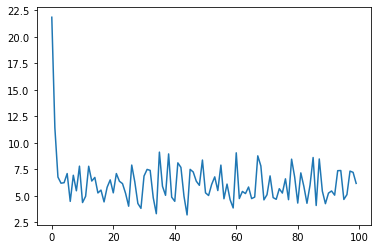

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_loss)

On va traser la variation de la fonction accuracy en fonction des itéraction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp


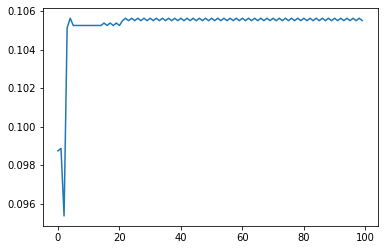

In [ ]:
all_accuracy=train_mlp(w1,b1,w2,b2,data,a1,a2,targets,100,lr=0.001,k=6)
plt.plot(all_accuracy)

Q14:Création de la fonction test_mlp

In [ ]:
def test_mlp(w1,w2,b1,b2,data_test,label_test):
    a0 = data_test # the data are the input of the first layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer
    test_accuracy=accuracy(one_hot(label_test),a2) # Calculer l'accuracy 
    return test_accuracy

Q15 :Création de la fonction run_mlp_training

In [ ]:
def run_mlp_training(data_train, labels_train, data_test, labels_test,d_h,lr,num_epoch):

  N = data_train.shape[0]  # number of input data
  d_in = data_train.shape[1]  # input dimension
  d_out = 10  # output dimension (number of neurons of the output layer)

  # Random initialization of the network weights and biaises
  w1 = 2 * np.random.rand(d_in, d_h) - 1  # first layer weights
  b1 = np.zeros((1, d_h))  # first layer biaises
  w2 = 2 * np.random.rand(d_h, d_out) - 1  # second layer weights
  b2 = np.zeros((1, d_out))  # second layer biaises

  data = data_train  # create a random data
  targets = labels_train  # create a random targets

 


  all_accuracy=[]
  
  for i in range(num_epoch):

    # Forward pass
    a0 = data # the data are the input of the first layer
    z1 = np.matmul(a0, w1) + b1  # input of the hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
    z2 = np.matmul(a1, w2) + b2  # input of the output layer
    a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
    predictions = a2  # the predicted values are the outputs of the output layer
    loss=loss_entropy(targets,predictions)
    acc=accuracy(one_hot(targets),predictions)



    dc_z2=a2-one_hot(np.array(targets)) # calcule le dérivé du cout par rapport à z2
    dc_w2=np.dot(a1.T,dc_z2)#calcule de la dérivé du cout par rapport à w2
    mat=np.ones((1,data.shape[0]),dtype=float) 
    dc_b2=np.dot(mat,dc_z2) # calcule de dérivé du cout par rapport à b2
    dc_a1=np.dot(dc_z2,w2.T)# calcule de la dérivé du cout par rapport à a1
    dc_z1=dc_a1*a1*(1-a1)# calcule de la dérivé du cout par rapport à z1
    dc_w1=np.dot(data.T,dc_z1)# calcule de la dérivé du cout par rapport à w1
    dc_b1=np.dot(mat,dc_z1)#calcule de la dérivé du cout par rapport à b1
  
  
    w1=w1-lr*dc_w1
    w2=w2-lr*dc_w2
    b1=b1-lr*dc_b1
    b2=b2-lr*dc_b2


    all_accuracy.append(acc)
  # Forward pass
  
  z1 = np.matmul(data_test, w1) + b1  # input of the hidden layer
  a1 = 1 / (1 + np.exp(-z1))  # output of the hidden layer (sigmoid activation function)
  z2 = np.matmul(a1, w2) + b2  # input of the output layer
  a2 = 1 / (1 + np.exp(-z2))  # output of the output layer (sigmoid activation function)
  predictions = a2  # the predicted values are the outputs of the output layer
  acc=accuracy(one_hot(targets),predictions)

  print(all_accuracy,acc)